In [31]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# dataframe data and metrics handling libraries
import pandas as pd
import numpy as np

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Modelling helpers
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)

full = train.append(test, ignore_index=True)
titanic = full[:891]
del train, test

print('full data:', full.shape, 'titanic:',titanic.shape)

(891, 12)
full data: (1309, 12) titanic: (891, 12)


In [33]:
# run the code to see the variables
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [34]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


In [35]:
full.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [36]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.096067,-0.189119,0.036847,-0.369226,-0.308247,-0.077221
Fare,0.096067,1.000000,0.216225,0.012658,-0.549500,0.159651,0.257307
Parch,-0.189119,0.216225,1.000000,-0.001652,0.018443,0.414838,0.081629
PassengerId,0.036847,0.012658,-0.001652,1.000000,-0.035144,-0.057527,-0.005007
Pclass,-0.369226,-0.549500,0.018443,-0.035144,1.000000,0.083081,-0.338481
SibSp,-0.308247,0.159651,0.414838,-0.057527,0.083081,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


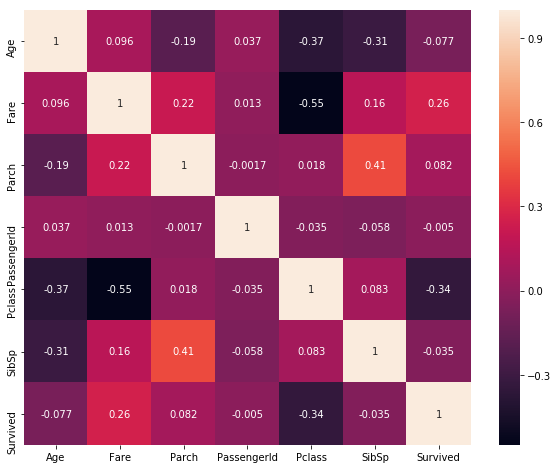

In [37]:
corr = titanic.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
corr

In [38]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ))
    facet.add_legend()

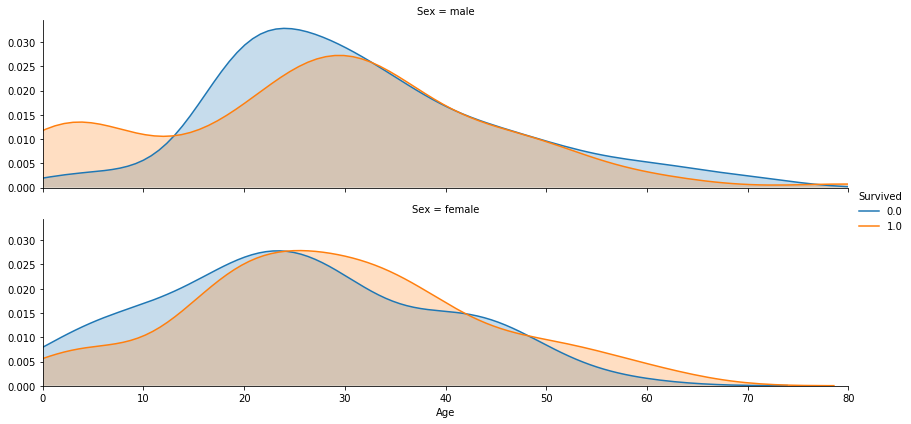

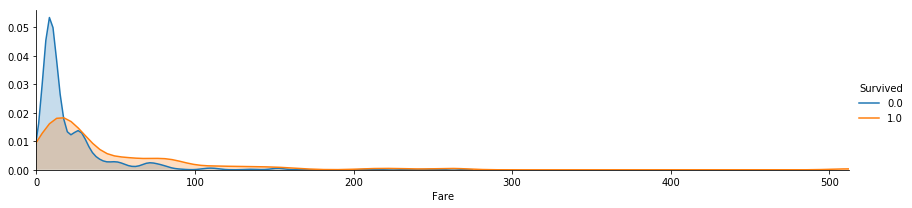

In [39]:
plot_distribution(titanic, var='Age',target='Survived',row='Sex')
plot_distribution(titanic, var='Fare',target='Survived')


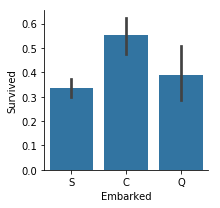

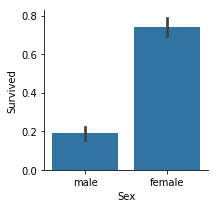

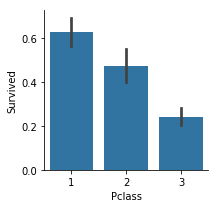

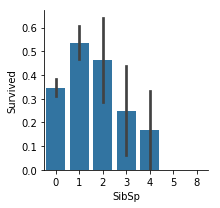

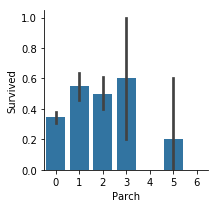

In [40]:
def plot_categories(df, cat, target, **kwarges):
    row = kwarges.get('row' ,None)
    col = kwarges.get('col', None)
    facet = sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()
plot_categories(titanic, cat='Embarked', target='Survived')
plot_categories(titanic, cat='Sex', target='Survived')
plot_categories(titanic, cat='Pclass', target='Survived')
plot_categories(titanic, cat='SibSp', target='Survived')
plot_categories(titanic, cat='Parch', target='Survived')

In [41]:
# Transform Sex into binary values 0 or 1
sex = pd.Series(np.where(full.Sex=='male',1,0), name='Sex')
sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [42]:
# Create a new variable for every unique value of Embarked
embarked = pd.get_dummies(full.Embarked, prefix='Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [43]:
# Create a variable for every unique value of Pclass
pclass = pd.get_dummies(full.Pclass, prefix='Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [44]:
# Create dataset
imputed = pd.DataFrame()

# Fill missing values of Age with the average of Age
imputed['Age'] = full.Age.fillna(full.Age.mean())
# Fill missing values of Fare with the average of Fare
imputed['Fare'] = full.Fare.fillna(full.Fare.mean())
imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [45]:
# Create dataset
title = pd.DataFrame()

# Extract the title from each name
title['Title'] = full['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

# Find out different titles
#print(title['Title'].unique())

# A map of more aggregated titles
Title_Dictionary = {'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Jonkheer': 'Royalty', 'Don':'Royalty',
                    'Sir':'Royalty', 'Dr':'Officer', 'Rev': 'Officer', 'the Countess':'Royalty', 'Dona':'Royalty',
                    'Mme': 'Mrs', 'Mlle':'Miss', 'Ms':'Mrs', 'Mr':'Mr', 'Mrs':'Mrs', 'Miss':'Miss', 'Master':'Master',
                    'Lady':'Royalty'}
# Map each title
title.Title = title.Title.map(Title_Dictionary)
title = pd.get_dummies(title.Title)
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [46]:
# Create dataset
cabin = pd.DataFrame()

# Replacing missing cabins with 'U' (unknown)
cabin['Cabin'] = full.Cabin.fillna('U')

# Mapping each cabin value with the first letter of cabin
cabin['Cabin'] = cabin['Cabin'].map(lambda c: c[0])

# dummy encoding
cabin = pd.get_dummies(cabin.Cabin, prefix='Cabin')
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [47]:
# Define a function that extract each prefix of the ticket, return 'xxx' if no 
# prefix (i.e the ticket is a digit)
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    
    ticket = map(lambda t: t.strip(), ticket)
    
    ticket = list(filter(lambda t: not t.isdigit(), ticket))
    if len(ticket)>0:
        return ticket[0]
    else:
        return 'XXX'

# Create dataset
ticket = pd.DataFrame()

# Extracting dummy variables from tickets:
ticket['Ticket'] = full['Ticket'].map(cleanTicket)
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
# Create dataset
family = pd.DataFrame()

# Introducing a new feature: size of the family(including the passenger)
family['FamilySize'] = full['Parch']+full['SibSp']+1
family['Family_Single'] = family['FamilySize'].map(lambda s: 1 if s==1 else 0)
family['Family_Small'] = family['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
family['Family_Large'] = family['FamilySize'].map(lambda s: 1 if s>=5 else 0)
family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [117]:
# Select features/variables to include in the dataset from the list below:
# imputed, embarked, pclass, sex, family, cabin, ticket
full_x = pd.concat([imputed, embarked, pclass, sex, family, cabin, ticket], axis=1)
full_x.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex,FamilySize,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,22.0,7.2500,0,0,1,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,38.0,71.2833,1,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,35.0,53.1000,0,0,1,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [118]:
# Create all dataset that are necessary to train, validate and test models
train_valid_x = full_x[0:891]
train_valid_y = titanic.Survived
test_x = full_x[891:]
train_x, valid_x, train_y, valid_y = train_test_split(train_valid_x, train_valid_y, train_size=0.7)
print(full_x.shape, train_x.shape, valid_x.shape, train_y.shape, valid_y.shape, test_x.shape)

(1309, 59) (623, 59) (268, 59) (623,) (268,) (418, 59)


0.9935794542536116


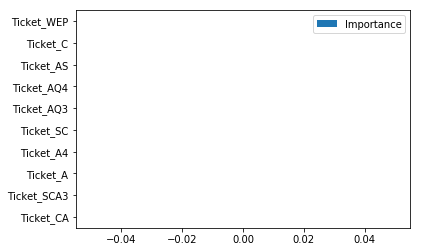

In [119]:
# evaluate the most important variables for the model to make the prediction

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame(
    model.feature_importances_ ,
    columns = [ 'Importance' ] ,
    index = X.columns
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
plot_variable_importance(train_x, train_y)

In [120]:
# Logistic Regression
model = LogisticRegression()

model.fit(train_x, train_y)
print(model.score(train_x, train_y), model.score(valid_x, valid_y))

0.826645264847512 0.8283582089552238


In [121]:
# Random forests
model = RandomForestClassifier(n_estimators=100)

model.fit(train_x, train_y)
print(model.score(train_x, train_y), model.score(valid_x, valid_y))

0.9935794542536116 0.8022388059701493


In [122]:
# Support vector machines
model = SVC()

model.fit(train_x, train_y)
print(model.score(train_x, train_y), model.score(valid_x, valid_y))

0.7800963081861958 0.7126865671641791


In [123]:
# Gradient Boosting Classifier
model = GradientBoostingClassifier()

model.fit(train_x, train_y)
print(model.score(train_x, train_y), model.score(valid_x, valid_y))

0.9052969502407705 0.832089552238806


In [124]:
# K-nearest neighbors
model = KNeighborsClassifier(n_neighbors=3)

model.fit(train_x, train_y)
print(model.score(train_x, train_y), model.score(valid_x, valid_y))

0.841091492776886 0.6940298507462687


In [125]:
# Gaussian Naive Bayes
model = GaussianNB()

model.fit(train_x, train_y)
print(model.score(train_x, train_y), model.score(valid_x, valid_y))

0.48154093097913325 0.41044776119402987


In [128]:
# Select Logistic Regression Classifier
model = LogisticRegression()
model.fit(train_x, train_y)

test_Y = model.predict(test_x).astype(np.int64)
passenger_id = full[891:].PassengerId
test = pd.DataFrame({'PassengerId': passenger_id,'Survived': test_Y})
test.to_csv('titanic_pred.csv',index=False)